In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bank = pd.read_csv('ADAN8888/data/raw/bank_raw.csv')

In [3]:
# Data Exploration 

In [4]:
bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
bank.shape

(10000, 14)

In [6]:
# check data info
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check the unique values for each column
bank.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
# check missing values
bank.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# understand Numerical feature
# discrete/continuous
# 'CreditScore', 'Age', 'Tenure', 'NumberOfProducts'
# 'Balance', 'EstimatedSalary'
bank[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Exited', ylabel='EstimatedSalary'>

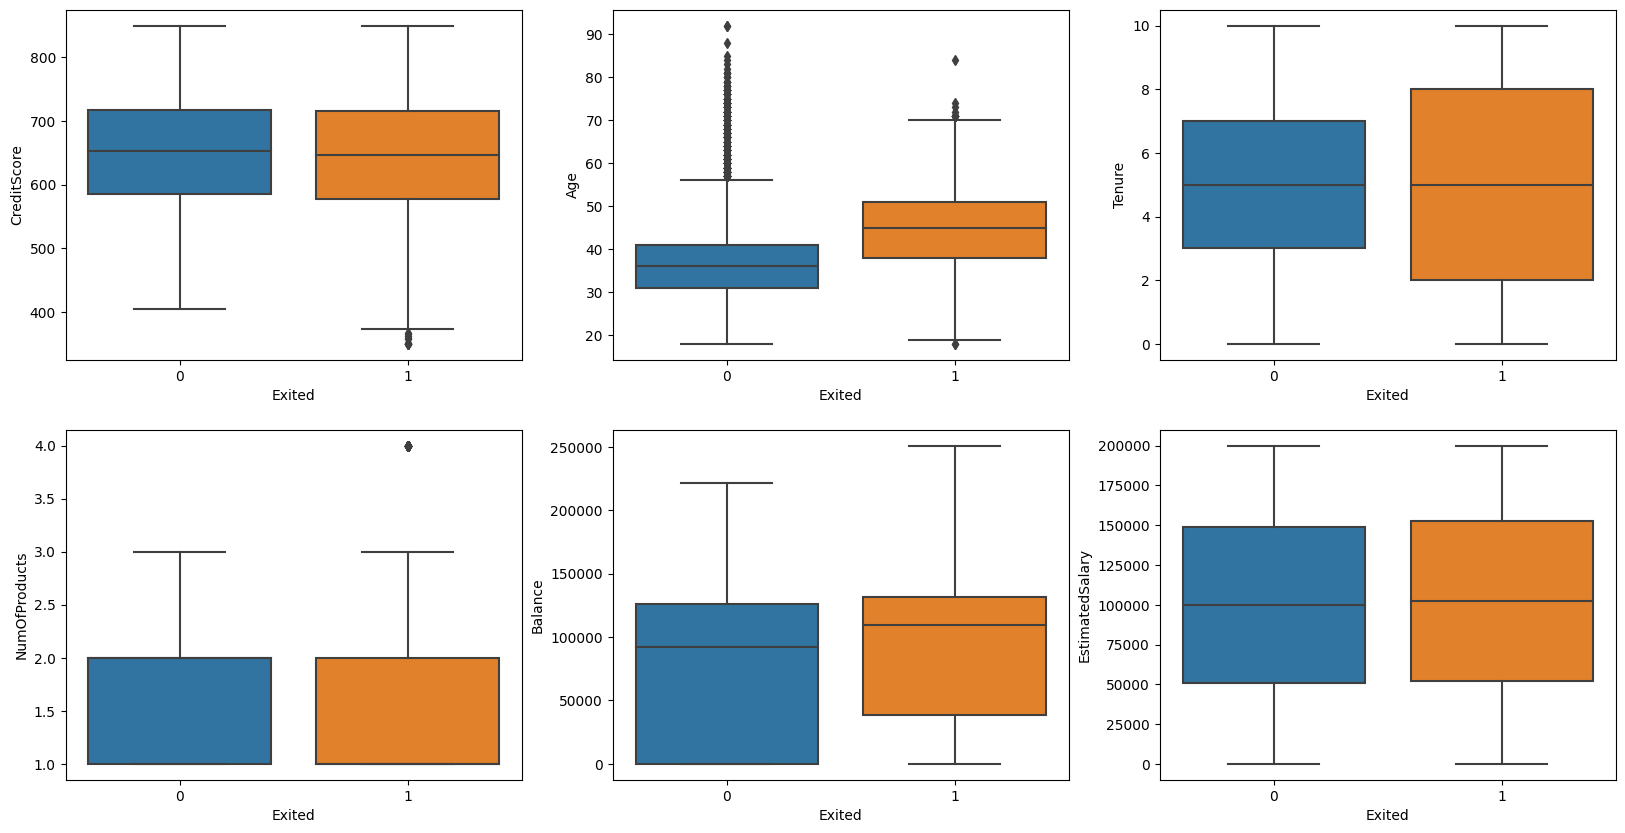

In [11]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=bank, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=bank, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=bank, ax=axss[0][2])
sns.boxplot(x='Exited', y ='NumOfProducts', data=bank, ax=axss[1][0])
sns.boxplot(x='Exited', y ='Balance', data=bank, ax=axss[1][1])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=bank, ax=axss[1][2])

<AxesSubplot: xlabel='Exited', ylabel='count'>

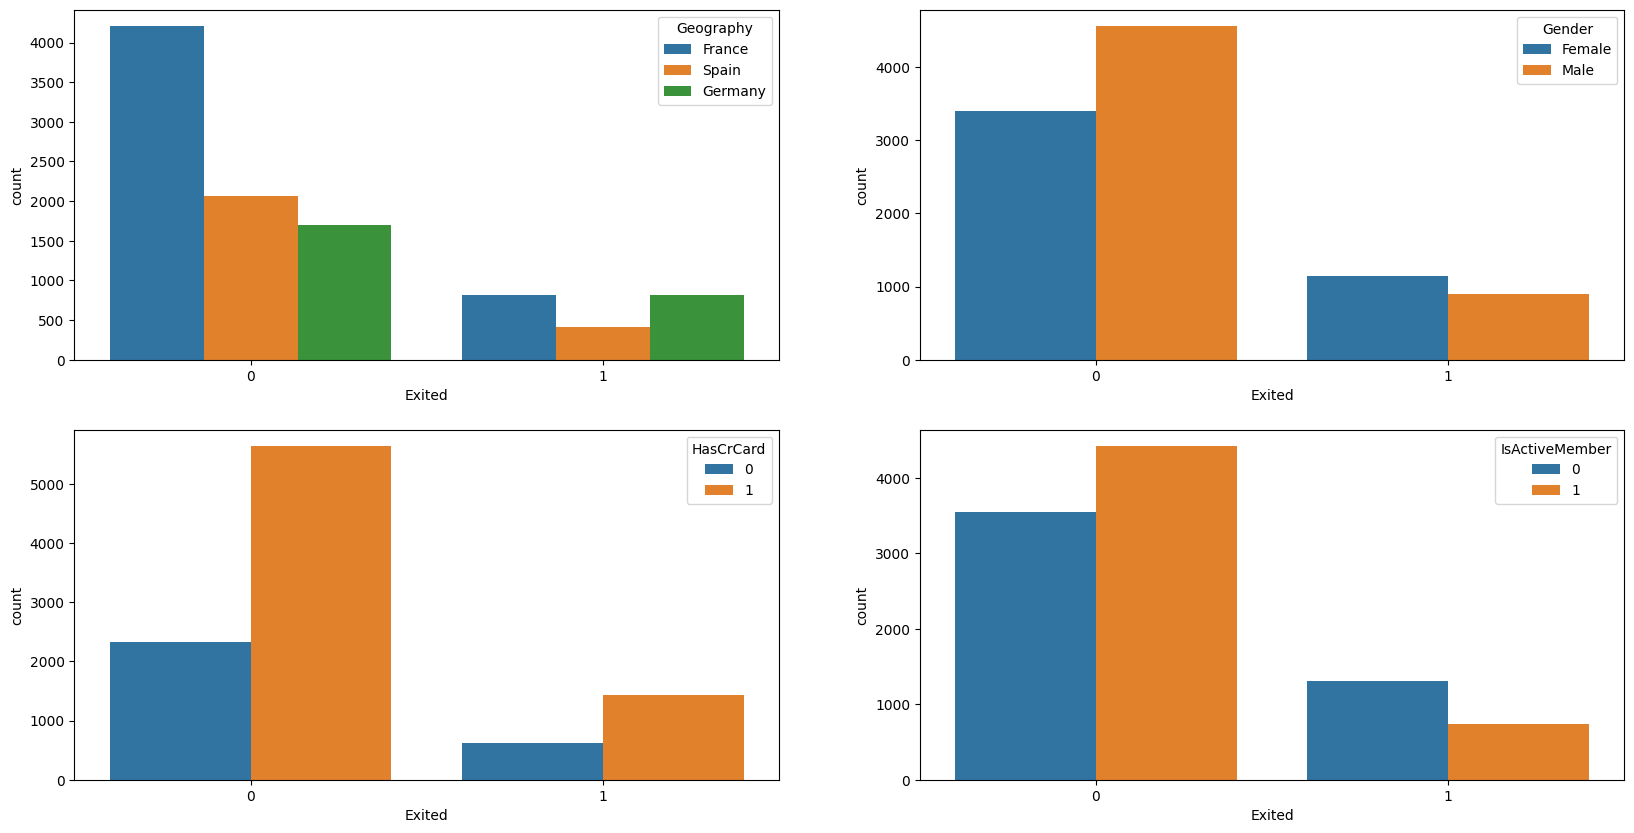

In [12]:
# understand categorical feature
# 'Geography', 'Gender'
# 'HasCrCard', 'IsActiveMember'
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=bank, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=bank, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=bank, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=bank, ax=axss[1][1])

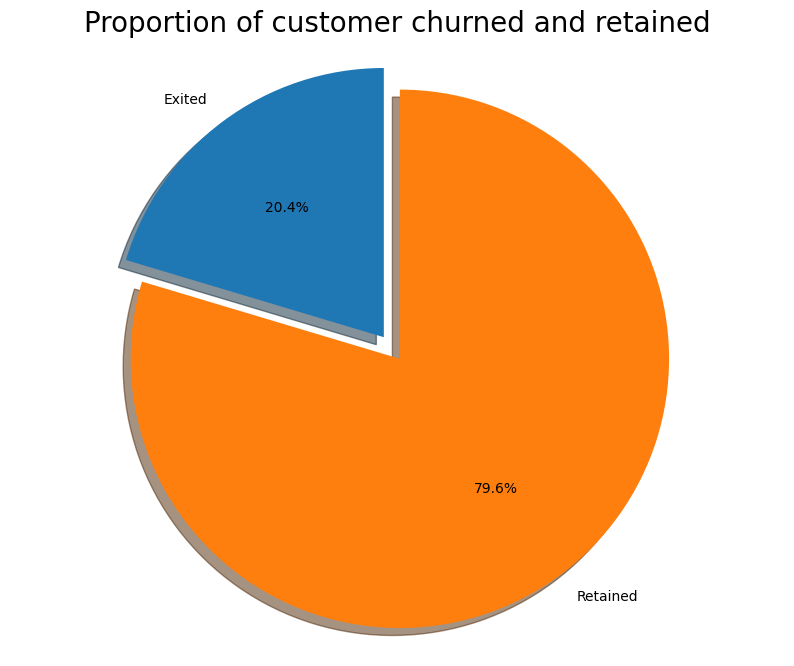

In [13]:
labels = 'Exited', 'Retained'
sizes = [bank.Exited[bank['Exited']==1].count(), bank.Exited[bank['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [14]:
# Feature Preprocessing
# Drop useless feature
bank1 = bank.drop(['RowNumber','CustomerId','Surname','Exited'], axis=1)

In [15]:
bank1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
bank1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [17]:
# Get target variable
y = bank['Exited']

In [18]:
# convert categorical varaiables to numerical variables
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bank1['Gender']= lb.fit_transform(bank1['Gender'])

In [19]:
bank1 = pd.get_dummies(bank1, columns = ['Geography'])

In [20]:
X = bank1

In [21]:
X.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0


In [22]:
# Splite data into training and testing
from sklearn import model_selection

# #stratified sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state=1) 

In [23]:
# validation 
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, stratify = y, random_state=1)

In [24]:
# Standardize/Normalize Data
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.fit_transform(X_test)